In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import yfinance as yf
yf.pdr_override()

In [5]:
start = dt.datetime(2020,1,1)
Data = pdr.get_data_yahoo("NFLX",start)

[*********************100%***********************]  1 of 1 completed


In [6]:
Data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,326.100006,329.980011,324.779999,329.809998,329.809998,4485800
2020-01-03 00:00:00-05:00,326.779999,329.859985,325.529999,325.899994,325.899994,3806900
2020-01-06 00:00:00-05:00,323.119995,336.359985,321.200012,335.829987,335.829987,5663100
2020-01-07 00:00:00-05:00,336.470001,336.700012,330.299988,330.750000,330.750000,4703200
2020-01-08 00:00:00-05:00,331.489990,342.700012,331.049988,339.260010,339.260010,7104500


## Calculate ATR for Netflix stock data.
### Formula : TR = max[ High-Low,  | High-Close(Previous) |, | Low-Close(Previous) | ]

In [9]:
high_low = Data["High"] - Data["Low"]
high_cp = np.abs(Data["High"]-Data["Close"].shift())
low_cp = np.abs(Data["Low"]-Data["Close"].shift())

In [35]:
high_low.head()

Date
2020-01-02 00:00:00-05:00     5.200012
2020-01-03 00:00:00-05:00     4.329987
2020-01-06 00:00:00-05:00    15.159973
2020-01-07 00:00:00-05:00     6.400024
2020-01-08 00:00:00-05:00    11.650024
dtype: float64

### STEP 1: Calculate maximum volatility for True Range.

In [15]:
TR = pd.concat([high_low,high_cp,low_cp],axis = 1)

In [18]:
True_Range = np.max(TR, axis =1 )

In [20]:
True_Range.head()

Date
2020-01-02 00:00:00-05:00     5.200012
2020-01-03 00:00:00-05:00     4.329987
2020-01-06 00:00:00-05:00    15.159973
2020-01-07 00:00:00-05:00     6.400024
2020-01-08 00:00:00-05:00    11.950012
dtype: float64

### Step 2: Calculate Average True Range with rolling period of 14.

In [21]:
Average_true_range = True_Range.rolling(14).mean()

In [34]:
Average_true_range.iloc[14:20]

Date
2020-01-23 00:00:00-05:00    10.414289
2020-01-24 00:00:00-05:00    11.102862
2020-01-27 00:00:00-05:00    10.887150
2020-01-28 00:00:00-05:00    11.117148
2020-01-29 00:00:00-05:00    11.038576
2020-01-30 00:00:00-05:00    11.048575
dtype: float64

### Step3: Plot Average True range and compare it with close price of day.

Text(0, 0.5, 'Price')

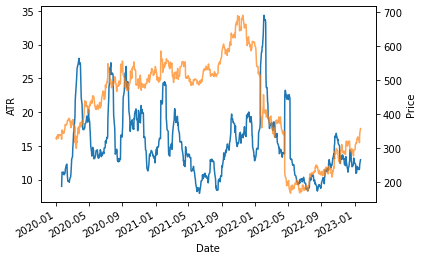

In [28]:
fig,ax = plt.subplots()
Average_true_range.plot(ax=ax)
ax2 = Data["Close"].plot(ax=ax, secondary_y = True, alpha =.7)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")